In [4]:
import numpy as np; import pylab as pl; import os, time, pickle; import matplotlib.pyplot as plt
ITD_limit = 160
stim_no = 33
stim_range = np.arange(-ITD_limit, ITD_limit, 2*ITD_limit/stim_no)
N = 12500
simtime = 1*1000.
t_trans = 150.
f = open('po_init', 'rb'); pitds = pickle.load(f); f.close()
po_init=pitds

n_cores = 4
trial_no = 1

In [5]:
def pega_resultados(raiz, stim, core):
    bloco = []
    #print(trial)
    #file = np.loadtxt(f"../SpecNet-master/Results/N1000g10.0_FS_[1, 0, 0, 0]_Mod0.0/spikes-all-st{i}-tr0-2050-0.gdf", skiprows=3)
    file = np.loadtxt(raiz.format(core=core, stim=stim), skiprows=3)
    bloco.append(file[:,0])
    
    return np.concatenate(bloco)


def generate_TC(raiz):
    tc = []
    for st in range(len(stim_range)):
        fr = np.zeros(N)
        senders = []
        for core in range(n_cores):
            senders.append(pega_resultados(raiz, st, core))
        senders = np.concatenate(senders)
        fr = np.array([len(np.where(senders == n)[0]) / ((simtime-t_trans)/1000) for n in range(1,N+1)])
        tc.append(fr)

    return np.array(tc)

def plot_TC(tc, neurons, label=po_init):
    for neuron in neurons:
        plt.plot(stim_range[:], tc[:,neuron], 'o-', label=round(label[neuron],1))
        plt.xlabel("ITD Estimulo (ms)")
        plt.ylabel("Taxa de disparo (spike/s)")
    plt.legend(bbox_to_anchor=(1.25,1))

In [12]:
tcs = []

for tr in range(trial_no):
    raiz = 'Results/N12500g8_Jrec=0.01/spikes-all-st{stim}-tr'+str(tr)+'-12501-{core}.dat'
    tr = generate_TC(raiz)
    tcs.append(tr)
    

In [13]:
np.shape(tcs)

(1, 33, 12500)

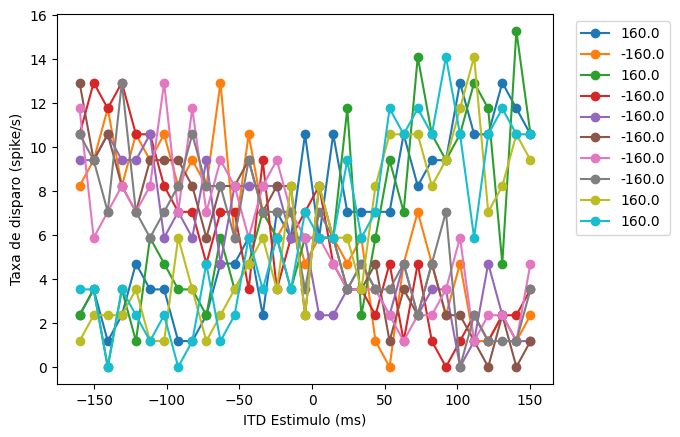

In [14]:
plot_TC(tcs[0], range(10))

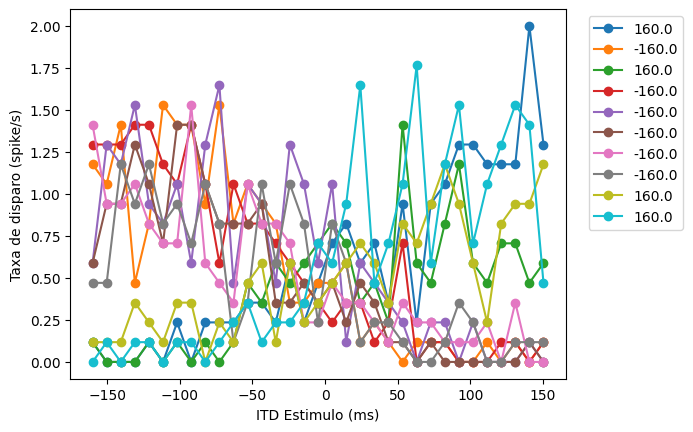

In [6]:
number = 10
tc_mean_sample = np.mean(tcs[:number], axis = 0)
plot_TC(tc_mean_sample, range(number))

In [14]:
tc_mean = np.mean(tcs, axis=0)

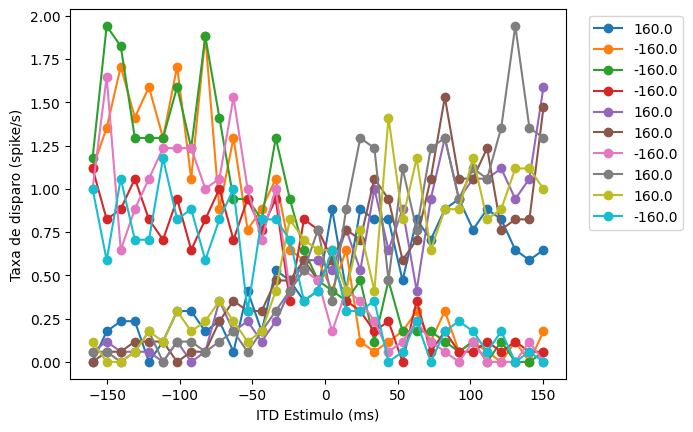

In [15]:
plot_TC(tc_mean, range(800,810))

In [16]:
po_output = []
for n in range(N):
    poo = list(tc_mean[:,n]).index(max(tc_mean[:,n]))
    po_output.append(np.mean(stim_range[poo]))

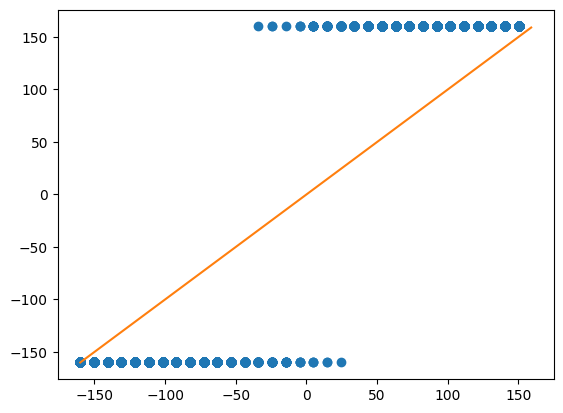

In [17]:
x = po_init
y = stim_range[np.argmax(tc_mean, axis=0)]
plt.plot(y, x, "o")
plt.plot(np.arange(-160,160), np.arange(-160,160))

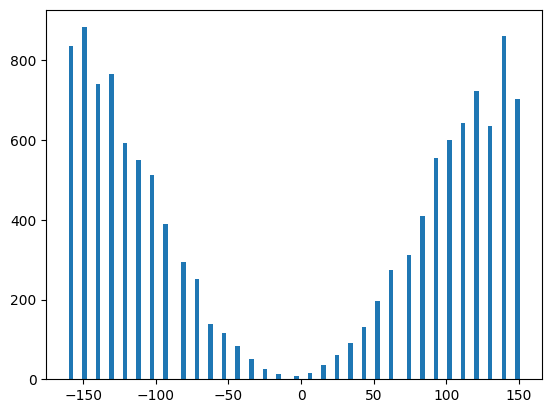

In [18]:
plt.hist(np.array(po_output), bins = 100);

In [19]:
po_output = np.array(po_output)

In [20]:
po_middle = np.where((po_output > -20) & (po_output < 20))

In [21]:
po_middle

(array([  191,   531,   651,  1003,  1068,  1275,  1658,  1922,  1944,
         1955,  2359,  3366,  3666,  3727,  5288,  5435,  6130,  6272,
         6354,  6358,  6435,  6577,  6958,  7193,  7269,  7271,  7374,
         7797,  7891,  7964,  8097,  8379,  8413,  8753,  8758,  8862,
         8979,  9235,  9278,  9466,  9472,  9751,  9818,  9834,  9922,
         9984,  9991, 10057, 10376, 10437, 10491, 10537, 10841, 10866,
        10895, 10937, 11224, 11319, 11381, 11423, 11488, 11516, 11540,
        11682, 11881, 12058, 12112, 12138, 12343, 12360, 12406]),)

In [22]:
np.shape(tcs)

(20, 33, 12500)

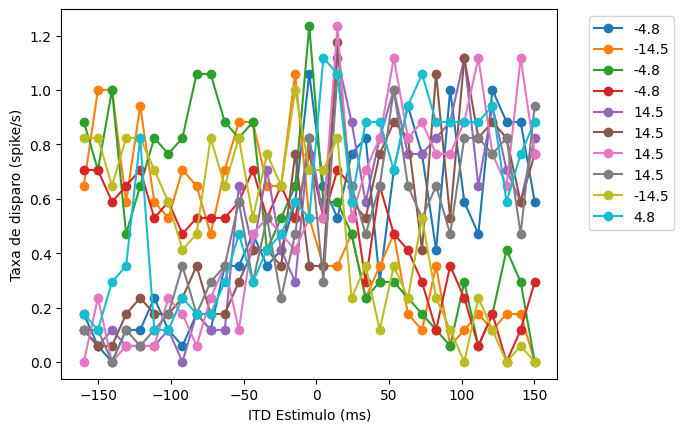

In [23]:
plot_TC(tc_mean,po_middle[0][40:50], po_output)

In [41]:
b = np.argsort(po_output)

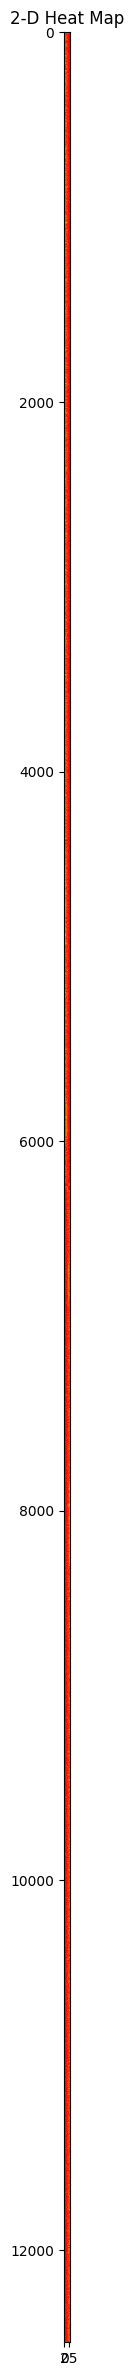

In [42]:
plt.figure(figsize=(30,30))
plt.imshow(tc_mean.T[b], cmap = 'autumn' , interpolation = 'nearest')
plt.title( "2-D Heat Map" )
plt.show()

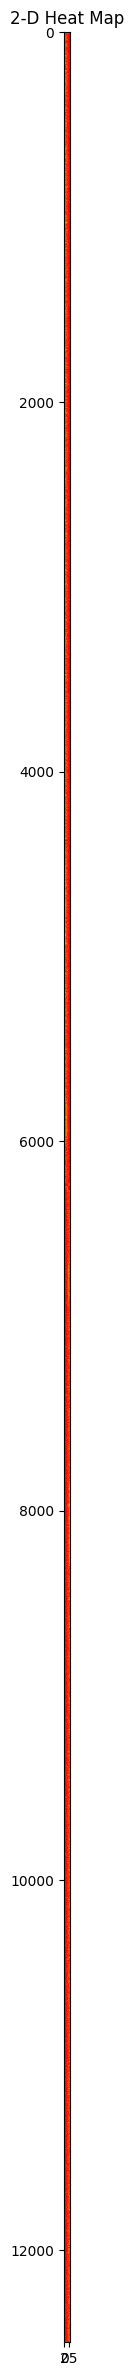

In [43]:
plt.figure(figsize=(30,30))
plt.imshow(tc_mean.T[b], cmap = 'autumn' , interpolation = 'nearest')
plt.title( "2-D Heat Map" )
plt.show()

In [1]:
po_init

NameError: name 'po_init' is not defined

In [57]:
file = open('po_init', 'wb'); pickle.dump(po_init, file); file.close()